# 1. Initial Data Exploration

**Objective:** The purpose of this notebook is to perform an initial exploratory data analysis (EDA) on the synthetic e-commerce dataset generated by `src/data/make_dataset.py`.

We will investigate the following:
1.  **Data Integrity:** Check for missing values, data types, and basic statistics.
2.  **Distributions:** Understand the distribution of key variables like `price`, `sales`, and `marketing_spend`.
3.  **Key Relationships:** Visually confirm the engineered relationships between variables:
    - The negative correlation between `price` and `sales` (price elasticity).
    - The positive impact of `marketing_spend` on `sales`.
    - The cyclical `seasonality` pattern in sales over the year.
4.  **Per-Product Analysis:** Briefly examine if different products exhibit different behaviours.

## Setup

Import necessary libraries and load the processed dataset. We will use the `config.py` file to ensure our file paths are consistent with the rest of the project.

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the project root to the Python path to allow importing 'config'
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

import config

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
try:
    DATA_PATH = config.PROCESSED_DATA_DIR / config.DATA_GENERATION['output_filename']
    df = pd.read_csv(DATA_PATH, parse_dates=['date'])
    print(f"Successfully loaded data from {DATA_PATH}")
except FileNotFoundError:
    print(f"Error: Data file not found at {DATA_PATH}.\nPlease run 'make data' or 'python src/data/make_dataset.py' first.")

Successfully loaded data from /Users/adam/Library/Mobile Documents/com~apple~CloudDocs/Documents/coding/repositories/price-optimisation-ecommerce/data/03_processed/synthetic_ecommerce_data.csv


## 2. Initial Data Inspection

Let's start with a high-level overview of the DataFrame.

In [2]:
df.head()

,date,product_id,price,sales,marketing_spend,day_of_year
0,2023-01-01,SKU-0,53.42,119,169.01,1
1,2023-01-01,SKU-1,46.16,169,153.28,1
2,2023-01-01,SKU-2,57.36,102,79.23,1
3,2023-01-01,SKU-3,62.27,111,88.13,1
4,2023-01-01,SKU-4,44.29,147,186.35,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             3655 non-null   datetime64[ns]
 1   product_id       3655 non-null   object        
 2   price            3655 non-null   float64       
 3   sales            3655 non-null   int64         
 4   marketing_spend  3655 non-null   float64       
 5   day_of_year      3655 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 171.5+ KB


In [4]:
df.describe()

,date,price,sales,marketing_spend,day_of_year
count,3655,3655.000000,3655.000000,3655.000000,3655.000000
mean,2024-01-01 00:00:00,54.659122,155.780848,100.329527,183.250342
min,2023-01-01 00:00:00,40.460000,51.000000,1.110000,1.000000
25%,2023-07-02 00:00:00,48.930000,127.000000,49.945000,92.000000
50%,2024-01-01 00:00:00,53.920000,153.000000,84.160000,183.000000
75%,2024-07-02 00:00:00,58.945000,181.000000,135.460000,275.000000
max,2024-12-31 00:00:00,75.270000,315.000000,581.750000,366.000000
std,NaN,6.895139,39.598641,69.652633,105.525396


**Observations:**
- The dataset is clean with no missing values.
- Data types are appropriate, with `date` correctly parsed.
- The numerical ranges in `.describe()` seem plausible for an e-commerce scenario.

## 3. Univariate Analysis: Distribution of Key Variables

Let's visualise the distributions of our main numerical features.

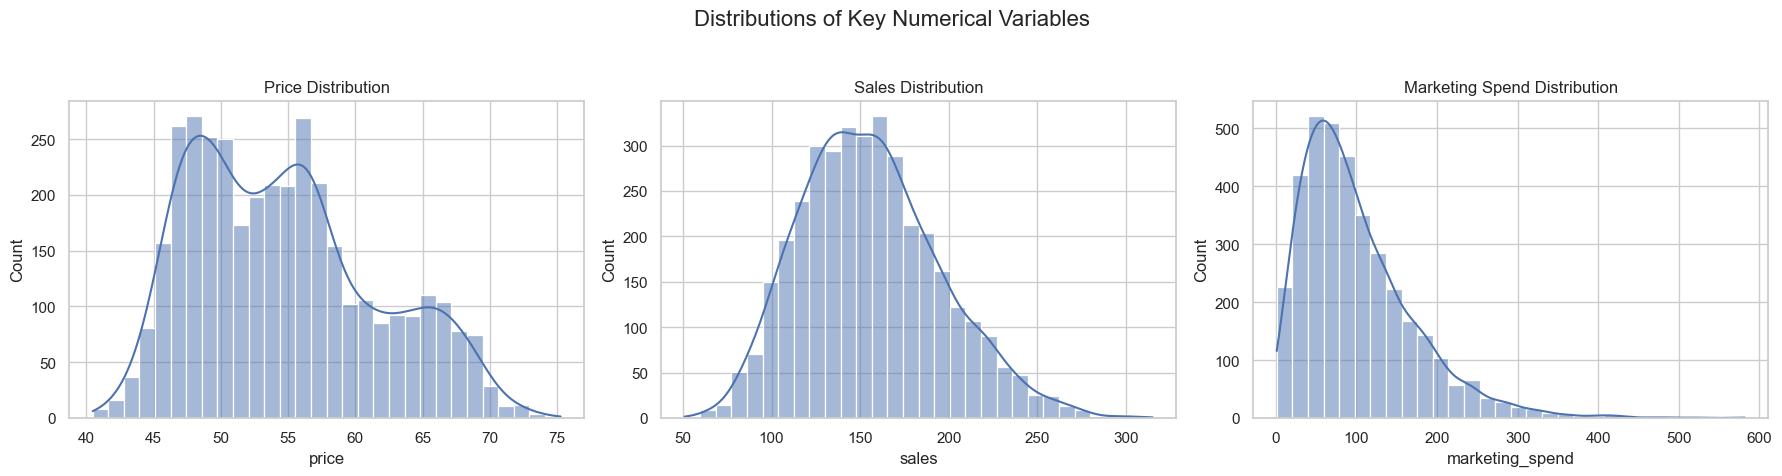

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distributions of Key Numerical Variables', fontsize=16)

sns.histplot(df['price'], ax=axes[0], kde=True, bins=30)
axes[0].set_title('Price Distribution')

sns.histplot(df['sales'], ax=axes[1], kde=True, bins=30)
axes[1].set_title('Sales Distribution')

sns.histplot(df['marketing_spend'], ax=axes[2], kde=True, bins=30)
axes[2].set_title('Marketing Spend Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observations:**
- `price` has a roughly normal distribution, which is expected since we simulated fluctuations around a base price for each product.
- `sales` are right-skewed, which is common in reality (many days with average sales, fewer with very high sales).
- `marketing_spend` is also right-skewed, reflecting a gamma distribution.

## 4. Bivariate Analysis: Exploring Key Relationships

This is the most critical part of the EDA, where we validate the core assumptions for our model.

### 4.1 Price vs. Sales (Price Elasticity)

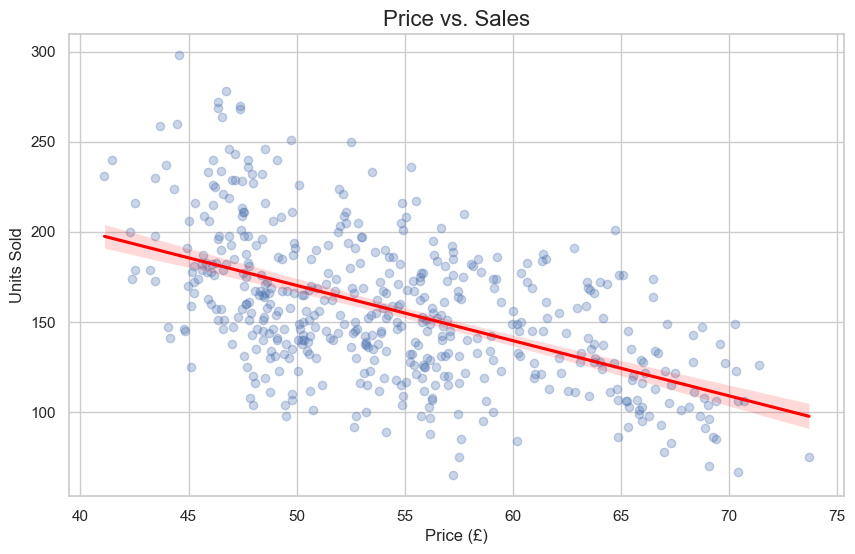

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df.sample(500), x='price', y='sales', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Price vs. Sales', fontsize=16)
plt.xlabel('Price (£)')
plt.ylabel('Units Sold')
plt.show()

**Observation:** As expected, we see a clear negative correlation. As the price increases, the number of units sold tends to decrease. This confirms the price elasticity effect was correctly generated.

### 4.2 Marketing Spend vs. Sales

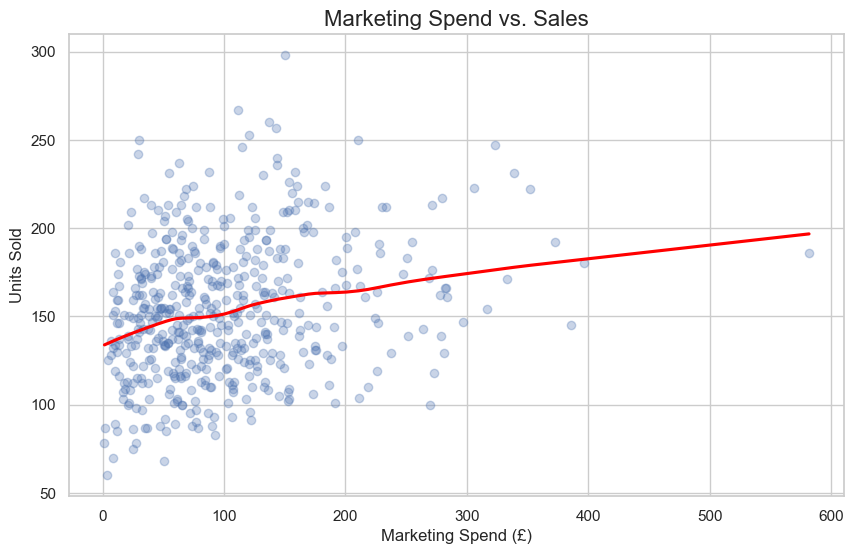

In [7]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df.sample(500), x='marketing_spend', y='sales', scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, lowess=True)
plt.title('Marketing Spend vs. Sales', fontsize=16)
plt.xlabel('Marketing Spend (£)')
plt.ylabel('Units Sold')
plt.show()

**Observation:** There is a positive, non-linear relationship. The impact of marketing spend on sales shows diminishing returns, which is a realistic assumption. The `lowess=True` line helps to visualise this curve.

### 4.3 Seasonality in Sales

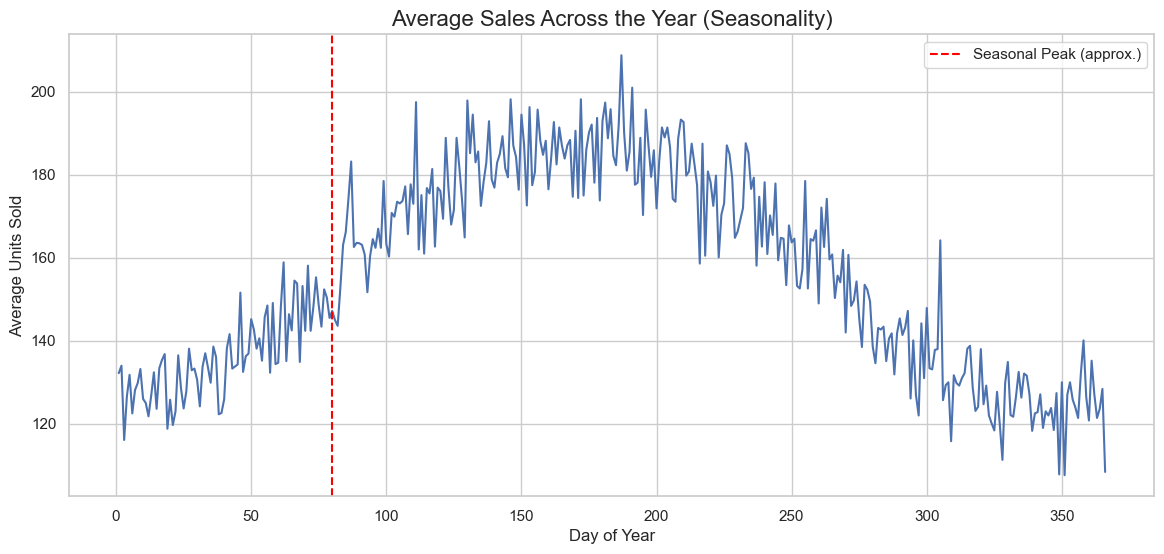

In [ ]:
daily_avg_sales = df.groupby('day_of_year')['sales'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_avg_sales, x='day_of_year', y='sales')
plt.title('Average Sales Across the Year (Seasonality)', fontsize=16)
plt.xlabel('Day of Year')
plt.ylabel('Average Units Sold')
plt.axvline(171, color='red', linestyle='--', label='Seasonal Peak (approx.)')
plt.legend()
plt.show()

**Observation:** The plot clearly shows a cyclical pattern, with a peak in sales around the 171st day of the year (June), which aligns perfectly with the sine wave function used in the data generation script. This confirms the seasonality component is present.

## 5. Per-Product Analysis

Let's see if the price elasticity relationship holds for individual products.

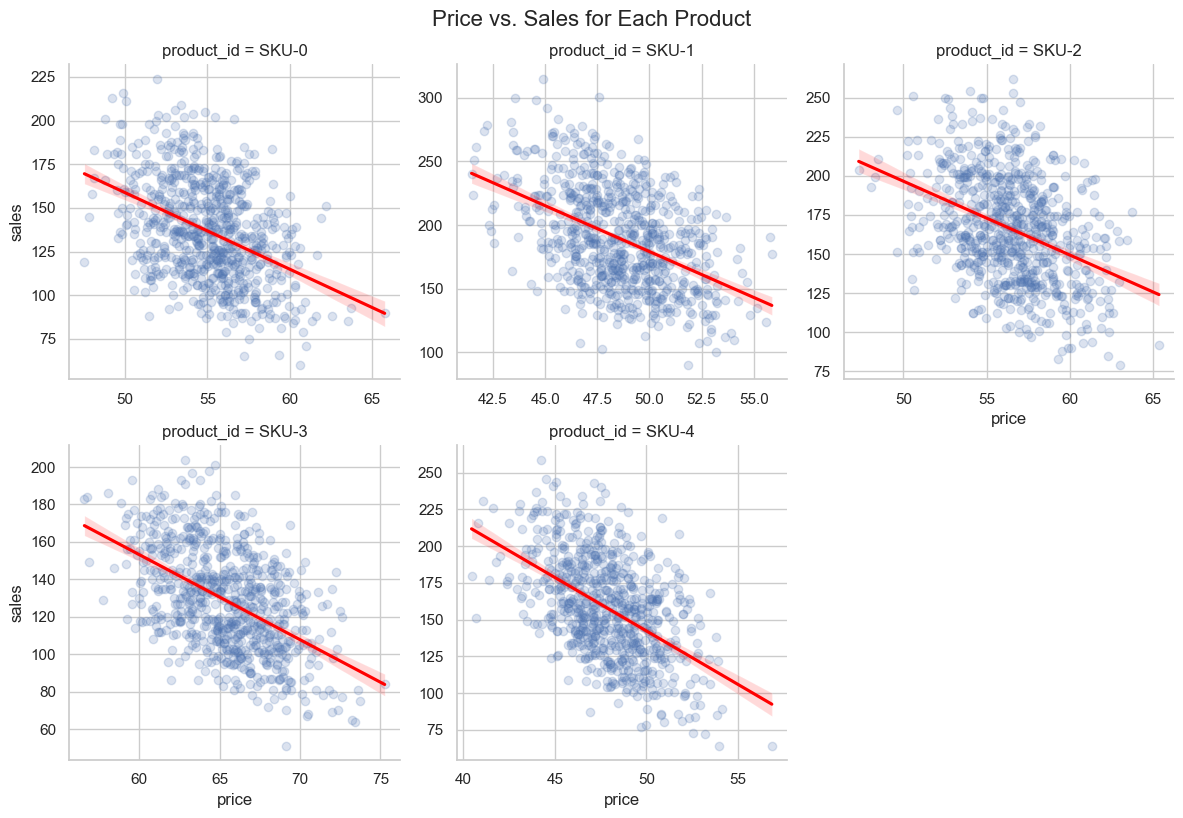

In [9]:
g = sns.FacetGrid(df, col="product_id", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.regplot, "price", "sales", scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
g.fig.suptitle('Price vs. Sales for Each Product', y=1.02, fontsize=16)
plt.show()

**Observation:** The negative relationship between price and sales is consistent across all product SKUs, although the slope (elasticity) and price range differ slightly for each, as intended by the data generation process.

## 6. Conclusion & Next Steps

The exploratory data analysis confirms that our synthetic dataset has the desired characteristics:
- It is clean and well-structured.
- It contains the key relationships (price elasticity, marketing impact, seasonality) that we intended to model.

The data appears to be an excellent foundation for training our Generalised Additive Model (GAM). The non-linear effects visualised here (especially for marketing and seasonality) are exactly what GAMs are designed to capture effectively.

**Next Step:** Proceed with `src/models/train_model.py` to train the GAM.